<a href="https://colab.research.google.com/github/jennadof/Deep-Neural-Network-project/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


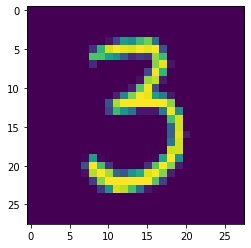

In [218]:
import os
import matplotlib.pyplot as plt
plt.imshow(trainsetX[50])
plt.show()


In [219]:
print(trainsety[50])

3


In [220]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [221]:
tf.__version__

'2.8.0'

In [222]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [223]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [224]:
x_train = tf.keras.utils.normalize(trainsetX, axis=1)
x_test = tf.keras.utils.normalize(testsetX, axis=1)

In [225]:
x_train.shape

(60000, 28, 28)

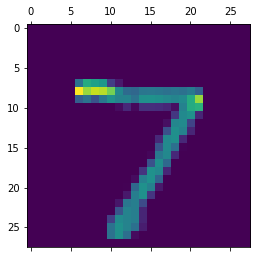

In [226]:
plt.matshow(x_test[0])

In [227]:
#flatten
import numpy as np
x_train = np.array(x_train).reshape(len(x_train), 28*28)
x_test = np.array(x_test).reshape(len(x_test), 28*28)

In [228]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [229]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [231]:
cnn = tf.keras.models.Sequential()

In [232]:
cnn.add(tf.keras.layers.Flatten(  input_shape=x_train.shape[1:]))
cnn.add(tf.keras.layers.Dense(128, activation='relu'))

In [233]:
#Full Connection

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [234]:
#Output Layer

cnn.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

In [235]:
#Model Summary

cnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [236]:
#TRAINING THE CNN

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [237]:
x_train.shape

(60000, 784)

In [238]:
trainsety.shape

(60000,)

In [239]:
cnn.fit( x_train, trainsety  , epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2613 - accuracy: 0.9242
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1069 - accuracy: 0.9661
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0727 - accuracy: 0.9769
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9821
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0410 - accuracy: 0.9867
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0321 - accuracy: 0.9894
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9908
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0213 - accuracy: 0.9924
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0168 - accuracy: 0.9942
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [240]:
trainsety.shape

(60000,)

In [241]:
cnn.evaluate(x_test,testsety )

313/313 [==============================] - 1s 2ms/step - loss: 0.1911 - accuracy: 0.9776


[0.19109021127223969, 0.9775999784469604]

In [242]:
predict_y = cnn.predict(x_test)


In [243]:
predict_y

array([[6.00929981e-15, 2.54426436e-06, 2.46375834e-07, ...,
        1.00000000e+00, 5.37041411e-10, 9.30157995e-08],
       [2.73459186e-21, 9.99999523e-01, 1.00000000e+00, ...,
        7.96868109e-16, 4.45025156e-10, 3.68255344e-33],
       [4.13635733e-14, 1.00000000e+00, 1.90754054e-06, ...,
        1.34709335e-05, 3.20761941e-08, 6.80121507e-18],
       ...,
       [4.46604369e-13, 2.82741816e-11, 3.24822357e-11, ...,
        1.56927571e-09, 7.88393850e-10, 2.12877989e-04],
       [1.18159180e-15, 4.06720654e-18, 4.03464730e-14, ...,
        5.47576572e-16, 1.21783733e-01, 1.49214951e-25],
       [6.20154901e-14, 2.71804367e-11, 2.66169611e-08, ...,
        5.62867195e-25, 5.22766811e-07, 8.38479383e-21]], dtype=float32)

In [244]:
predict_y_labels = [np.argmax(j) for j in predict_y]

In [245]:
predict_y_labels[0]

7

In [246]:
con_matrix = tf.math.confusion_matrix(labels = testsety, predictions = predict_y_labels)

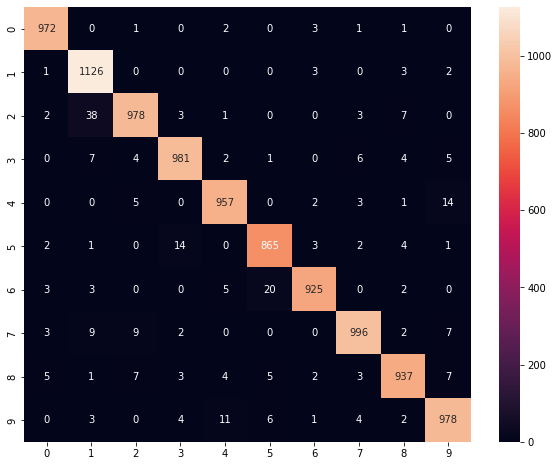

In [247]:
from tensorflow.python.ops import confusion_matrix
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(con_matrix, annot = True, fmt="d")